In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

import sys
sys.path.append("/home/jungyoung/Project/hh_neuralnet/include")
import hhtools

In [21]:
def pick_subdata(align_data, var):
    nid = -1
    for n, name in enumerate(align_data["row_names"]):
        if var == name:
            nid = n
            break

    if nid == -1:
        print("No row name: %s"%(var))
    
    return align_data["data"][nid, :]


def extract_data(align_data, bool_array):
    # boolean array
    new_data = dict(
        data=[], pop_types=[], row_names=[], row_labels=[],
        col_names=align_data["col_names"])
    
    num = np.shape(align_data["data"])[0]
    for n in range(num):
        if not bool_array[n]:
            continue
        
        new_data["data"].append(align_data["data"][n])
        new_data["pop_types"].append(align_data["pop_types"][n])
        new_data["row_names"].append(align_data["row_names"][n])
        new_data["row_labels"].append(align_data["row_labels"][n])
    
    new_data["data"] = np.array(new_data["data"])
    return new_data



In [15]:
def znorm(data):
    m = np.average(data)
    s = np.std(data)
    return (data - m) / s


def minmax(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


# ============ Load dataset ================ #

with open("./data/align_data.pkl", "rb") as fp:
    align_data = pkl.load(fp)
    
# remove some features
var_to_rm = ["cv(T)", "cv(T)_std", "cv(S)", "cv(S)_std", "cv(F)", "cv(F)_std",
             "frs_m(T)", "frs_m(T)_std", "frs_m(S)", "frs_m(S)_std"]

cond = [var not in var_to_rm for var in align_data["row_names"]]
align_data_rm = extract_data(align_data, cond)

# ============ Normalization ================ #

norm_data = np.zeros_like(align_data_rm["data"])
for nid, var in enumerate(align_data_rm["row_names"]):
    # z-score normalization
    if "leading_ratio" not in var:
        norm_data[nid] = znorm(align_data_rm["data"][nid])
    else:
        norm_data[nid] = align_data_rm["data"][nid]
        if "(abs)" in var:
            norm_data[nid] = 2*norm_data[nid]-1


save_fig = True

if save_fig:
    # print result figure
    for nid in range(len(norm_data)):
        fig = plt.figure(figsize=(4, 6))
        plt.subplot(211)
        plt.hist(align_data_rm["data"][nid], 100, edgecolor='k')
        plt.xlabel(align_data_rm["row_labels"][nid], fontsize=12)

        plt.subplot(212)
        plt.hist(norm_data[nid], 100, edgecolor='k')
        plt.xlabel("norm[" + align_data_rm["row_labels"][nid] + "]", fontsize=12)

        plt.tight_layout()
        plt.savefig("./fig_hist_data/%02d_%s.png"%(nid, align_data_rm["row_names"][nid]))
        plt.close(fig)

['chi(T)', 'chi(T)_std', 'chi(F)', 'chi(F)_std', 'chi(S)', 'chi(S)_std', 'frs_m(F)', 'frs_m(F)_std', 'ac2p_large(T)', 'ac2p_large(T)_std', 'ac2p_large(F)', 'ac2p_large(F)_std', 'ac2p_large(S)', 'ac2p_large(S)_std', 'tlag_large(T)', 'tlag_large(T)_std', 'tlag_large(F)', 'tlag_large(F)_std', 'tlag_large(S)', 'tlag_large(S)_std', 'ac2p_1st(T)', 'ac2p_1st(T)_std', 'ac2p_1st(F)', 'ac2p_1st(F)_std', 'ac2p_1st(S)', 'ac2p_1st(S)_std', 'tlag_1st(T)', 'tlag_1st(T)_std', 'tlag_1st(F)', 'tlag_1st(F)_std', 'tlag_1st(S)', 'tlag_1st(S)_std', 'cc1p(S)', 'cc1p(S)_std', 'tlag_cc(S)', 'tlag_cc(S)_std', 'leading_ratio(F)', 'leading_ratio(abs)(F)', 'dphi(S)', 'dphi(S)_std']
36


(array([2047.,  226.,  245.,  146.,  186.,  142., 1678.,   40.,   11.,
           4.]),
 array([-1.        , -0.84233333, -0.68466667, -0.527     , -0.36933333,
        -0.21166667, -0.054     ,  0.10366667,  0.26133333,  0.419     ,
         0.57666667]),
 <BarContainer object of 10 artists>)

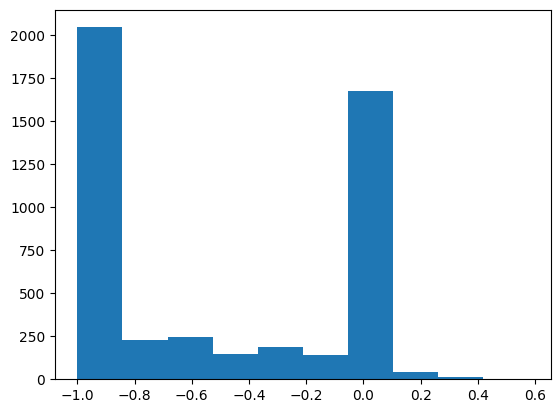

In [16]:
def get_value(target_name, row_name, data):
    for n, var in enumerate(row_name):
        if var == target_name:
            print(n)
            return data[n, :]
    return None

print(align_data_rm["row_names"])

vals = get_value("leading_ratio(F)", align_data_rm["row_names"], norm_data)
plt.hist(vals)

## Check normalized dataresult

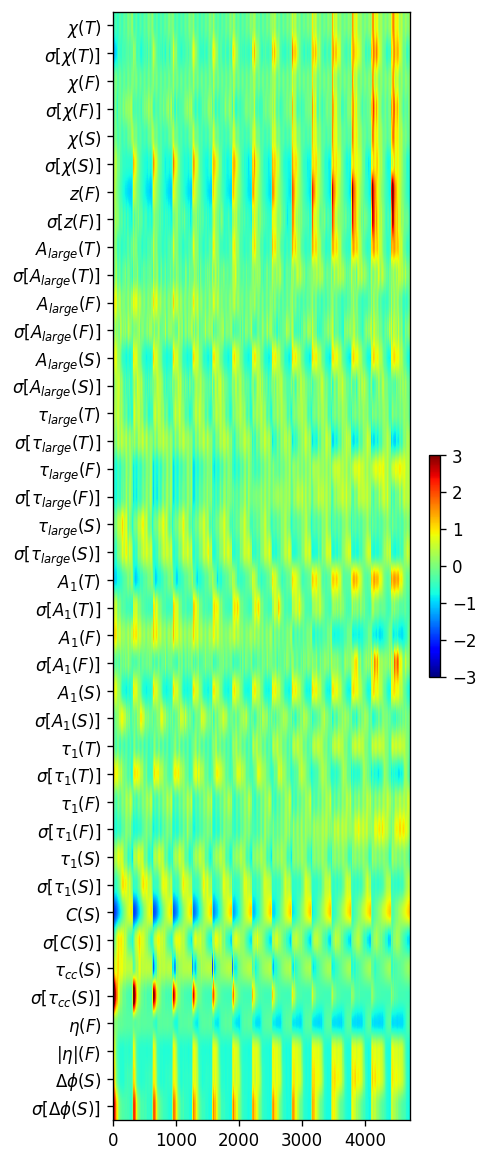

In [18]:
plt.figure(dpi=120, figsize=(4, 12))
plt.imshow(norm_data, aspect="auto", vmin=-3, vmax=3, cmap="jet")
plt.yticks(np.arange(len(align_data_rm["row_labels"])), labels=align_data_rm["row_labels"])
plt.colorbar(shrink=0.2)
plt.savefig("./fig_hist_data/summary_normalized_data.png")
plt.show()

## Split dataset and save

In [19]:
align_data_norm = align_data_rm.copy()
align_data_norm["data"] = norm_data

cond = [tp != "T" for tp in align_data_rm["pop_types"]]
align_data_sub = extract_data(align_data_norm, cond)
with open("./data/align_data_sub_n2.pkl", "wb") as fp:
    pkl.dump(align_data_sub, fp)
    
cond = [tp == "T" for tp in align_data_rm["pop_types"]]
align_data_tot = extract_data(align_data_norm, cond)
with open("./data/align_data_tot_n2.pkl", "wb") as fp:
    pkl.dump(align_data_tot, fp)
    

## Check dataset

In [157]:
with open("./data/align_data_sub_n2.pkl", 'rb') as fp:
    align_data_sub = pkl.load(fp)

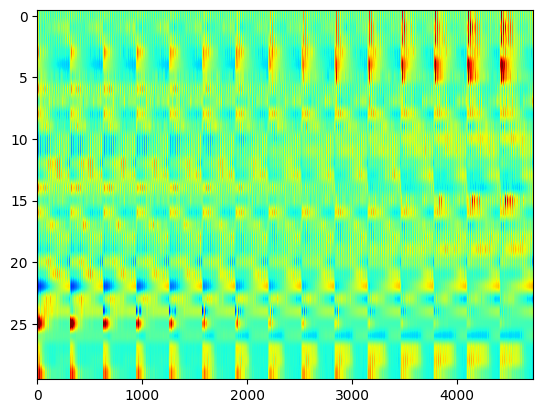

In [158]:
plt.imshow(align_data_sub["data"], aspect="auto", vmin=-3, vmax=3, cmap="jet")
plt.show()

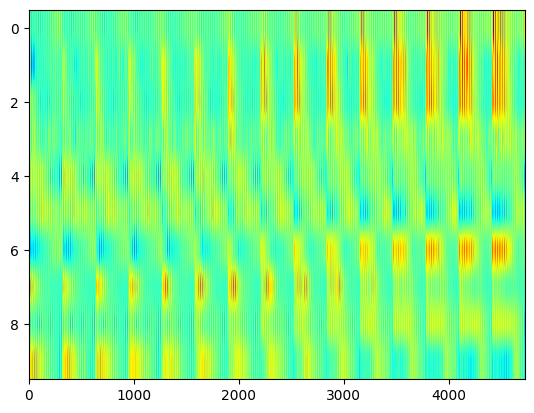

In [159]:
with open("./data/align_data_tot_n2.pkl", 'rb') as fp:
    align_data_tot = pkl.load(fp)
    
plt.imshow(align_data_tot["data"], aspect="auto", vmin=-3, vmax=3, cmap="jet")
plt.show()

## Compare result

# Covariance matrix

In [161]:
def get_cov(data):
    num = data.shape[0]
    cov_mat = np.zeros([num, num])
    for n0 in range(num):
        x = data[n0, :]
        x -= np.average(x)
        for n1 in range(n0, num):
            y = data[n1, :]
            y -= np.average(y)
            
            cov_mat[n0, n1] = np.average(x * y) #np.average(x * y) / np.std(x) / np.std(y)
            cov_mat[n1, n0] = cov_mat[n0, n1]
            
    return cov_mat

cov_mat = get_cov(norm_data)

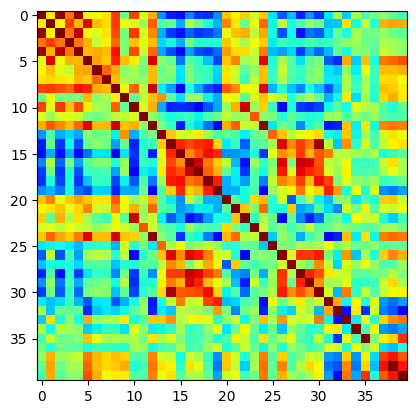

In [162]:
plt.figure()
plt.imshow(cov_mat, vmin=-1, vmax=1, cmap="jet")
plt.show()

# Test clustering using subpopulation data

In [80]:
def whitening(data, eps=1e-5):
    cov_mat = get_cov(data)
    eig_val, eig_vec = np.linalg.eigh(cov_mat)
    
    wdata = np.dot(eig_vec.T, data)
    for n in range(data.shape[0]):
        wdata[n] /= np.sqrt(eig_val[n] + eps)
    return wdata

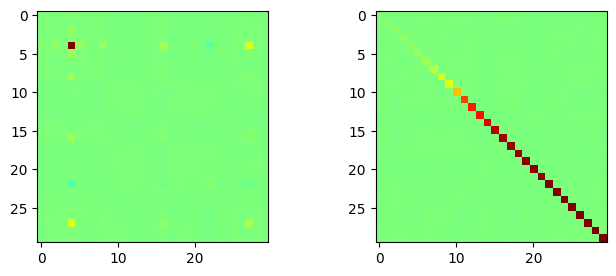

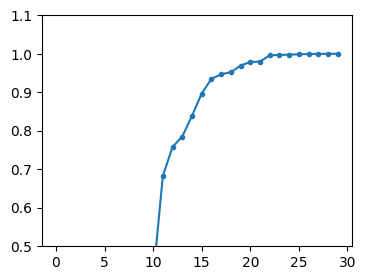

In [81]:
cond = [tp != "T" for tp in align_data_rm["pop_types"]]
align_data_sub = extract_data(align_data_rm, cond)
norm_sub = znorm(align_data_sub["data"])

cov_mat = get_cov(norm_sub)
wdata = whitening(norm_sub, eps=1e-5)
cov_mat_w = get_cov(wdata)


plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(cov_mat, vmin=-1, vmax=1, cmap="jet")

plt.subplot(122)
plt.imshow(cov_mat_w, vmin=-1, vmax=1, cmap="jet")
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(np.var(wdata, axis=1), '.-')
plt.ylim([0.5, 1.1])
plt.show()

In [82]:
# compare clustering result
# from sklearn.cluster import KMeans
import hhclustering as hc

seed = 100
K = 10

km_obj, sval, scoeff = hc.kmeans_specific_seed(K, norm_sub, seed)
km_obj_w, sval_w, scoeff_w = hc.kmeans_specific_seed(K, wdata, seed)

print(scoeff, scoeff_w) # whitening make worse

0.4615860334289221 0.3103582830299765


In [83]:
idc = km_obj.predict(norm_sub.T)
idc_w = km_obj_w.predict(wdata.T)

In [84]:
def draw_kmeans_result(data, idc):
    data_o, _, bd = hc.reorder_data(data, idc)
    # plt.figure()
    hhtools.imshow_xy(data_o, cmap="jet")
    plt.colorbar()
    
    yl = plt.ylim()
    for b in bd:
        plt.plot([b]*2, yl, 'k', lw=1)
    plt.ylim(yl)
    plt.xlim([0, data_o.shape[1]])
    
    plt.show()

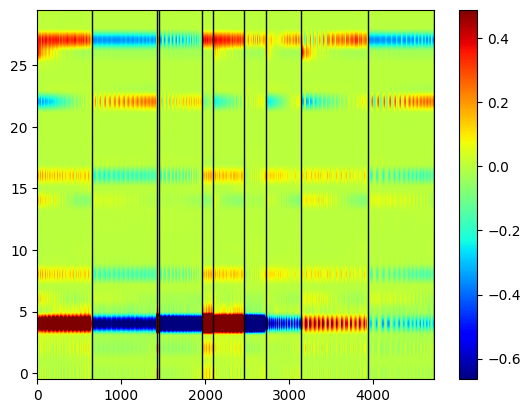

In [85]:
draw_kmeans_result(norm_sub, idc)

# Split data set & save

In [86]:
# subpopulation data
cond = [tp != "T" for tp in align_data_rm["pop_types"]]
align_data_sub = extract_data(align_data_rm, cond)
align_data_sub["data"] = znorm(align_data_sub["data"]) # normalize dataset
with open("./data/align_data_sub_n2.pkl", "wb") as fp:
    pkl.dump(align_data_sub, fp)

# total population data
cond = [tp == "T" for tp in align_data_rm["pop_types"]]
align_data_tot = extract_data(align_data_rm, cond)
align_data_tot["data"] = znorm(align_data_tot["data"])
with open("./data/align_data_tot_n2.pkl", "wb") as fp:
    pkl.dump(align_data_tot, fp)